# 텐서플로우 회귀 분석 모델

- 다양한 방법이 존재
- 텐서플로우2만 사용하는 방법, 케라스를 이용한 방법, 둘을 모두 섞은 방법 등등  


<br>

<br>

## 선형 회귀(Linear Regression)

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
lr = 0.01
training_steps = 1000

In [3]:
X = np.random.randn(50)
Y = 2 * X + np.random.randn(50)

In [4]:
# 가중치
W = tf.Variable(np.random.randn(), name='weight')
# 편향
b = tf.Variable(np.random.randn(), name='bias')

# 선형식
def linear_regression(x):
  return W * x + b

# 손실함수
def mean_squared(y_pred, y_true):
  return tf.reduce_mean(tf.square(y_pred - y_true))

# 확률적 경사하강법
optimizer = tf.optimizers.SGD(lr)

<br>

#### `tensorflow.optimizers.SGD(learning_rate)` : 확률적 경사하강법 옵티마이저 객체


#### `SGD.apply_gradients(grads_and_vars)` : SGD를 적용하여 가중치, 편향 업데이트 

In [5]:
def run_optimization():
  with tf.GradientTape() as tape:
    pred = linear_regression(X)
    loss = mean_squared(pred, Y)

  gradients = tape.gradient(loss, [W, b])

  optimizer.apply_gradients(zip(gradients, [W, b]))

In [6]:
for step in range(1, training_steps + 1):
  run_optimization()

  if step % 50 == 0:
    pred = linear_regression(X)
    loss = mean_squared(pred, Y)
    print("step: {:4d}\tloss: {:.4f}\tW: {:.4f}".format(step, loss, W.numpy(), b.numpy()))

step:   50	loss: 3.7936	W: -0.1433
step:  100	loss: 1.3925	W: 0.9295
step:  150	loss: 0.8635	W: 1.4307
step:  200	loss: 0.7458	W: 1.6659
step:  250	loss: 0.7194	W: 1.7766
step:  300	loss: 0.7134	W: 1.8289
step:  350	loss: 0.7121	W: 1.8535
step:  400	loss: 0.7118	W: 1.8652
step:  450	loss: 0.7117	W: 1.8708
step:  500	loss: 0.7117	W: 1.8734
step:  550	loss: 0.7117	W: 1.8746
step:  600	loss: 0.7117	W: 1.8752
step:  650	loss: 0.7117	W: 1.8755
step:  700	loss: 0.7117	W: 1.8756
step:  750	loss: 0.7117	W: 1.8757
step:  800	loss: 0.7117	W: 1.8757
step:  850	loss: 0.7117	W: 1.8757
step:  900	loss: 0.7117	W: 1.8757
step:  950	loss: 0.7117	W: 1.8758
step: 1000	loss: 0.7117	W: 1.8758


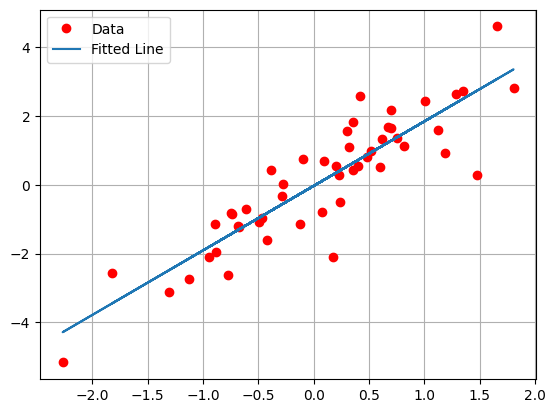

In [7]:
plt.plot(X, Y, 'ro', label='Data')
plt.plot(X, np.array(W * X + b), label='Fitted Line')
plt.legend()
plt.grid()
plt.show()

<br>

<br>

## 다항 회귀 (Nonlinear Regression)


<br>

### modules import

In [8]:
from tensorflow.keras.optimizers import Adam

<br>

### Hyper Parameters

In [9]:
epochs = 1000
lr = 0.04

<br>

### 변수 지정

In [10]:
a = tf.Variable(np.random.randn())
b = tf.Variable(np.random.randn())
c = tf.Variable(np.random.randn())

In [11]:
print(a.numpy(), b.numpy(), c.numpy())

-1.9020132 1.2042203 -0.33257407


<br>

### 데이터 지정

In [12]:
X = np.random.randn(50)
Y = X**2 + X*np.random.randn(50)

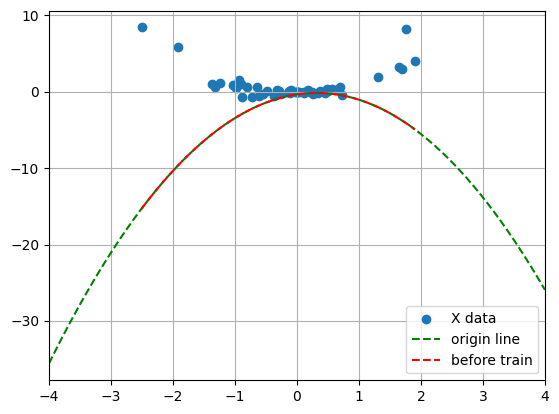

In [13]:
line_X = np.arange(min(X), max(X), 0.001)
line_Y = a*line_X**2 + b*line_X + c

X_ = np.arange(-4., 4., 0.001)
Y_ = a*X_**2 + b*X_ + c

plt.scatter(X, Y, label='X data')
plt.plot(X_, Y_, 'g--', label='origin line')
plt.plot(line_X, line_Y, 'r--', label='before train')
plt.xlim(-4., 4.)
plt.legend()
plt.grid()
plt.show()

<br>

### Util Functions

In [14]:
# 손실함수
def compute_loss():
  pred_y = a*(np.array(X)**2) + b*np.array(X) + c
  loss = tf.reduce_mean((Y-pred_y)**2)
  return loss

<br>

### Optimizer

<br>

#### `tensorflow.optimizers.Adam(learning_rate)` : Adam 옵티마이저 객체

#### `Adam.minimize(손실함수, var_list)` : Adam을 적용하여 변수(가중치) 업데이트

In [15]:
optimizer = Adam(lr)

<br>

### 학습

In [16]:
for epoch in range(1, epochs+1, 1):
  optimizer.minimize(compute_loss, var_list=[a, b, c])

  if epoch % 100 == 0:
    print("epoch: {:.4f}\ta: {:.4f}\tb: {:.4f}\tc: {:.4f}".format(epoch, a.numpy(), b.numpy(), c.numpy()))

epoch: 100.0000	a: 0.6827	b: 0.1374	c: 0.6392
epoch: 200.0000	a: 1.3407	b: 0.2436	c: -0.1662
epoch: 300.0000	a: 1.4364	b: 0.2586	c: -0.2800
epoch: 400.0000	a: 1.4412	b: 0.2594	c: -0.2857
epoch: 500.0000	a: 1.4413	b: 0.2594	c: -0.2858
epoch: 600.0000	a: 1.4413	b: 0.2594	c: -0.2858
epoch: 700.0000	a: 1.4413	b: 0.2594	c: -0.2858
epoch: 800.0000	a: 1.4413	b: 0.2594	c: -0.2858
epoch: 900.0000	a: 1.4413	b: 0.2594	c: -0.2858
epoch: 1000.0000	a: 1.4413	b: 0.2594	c: -0.2858


<br>

### 학습 후의 회귀선

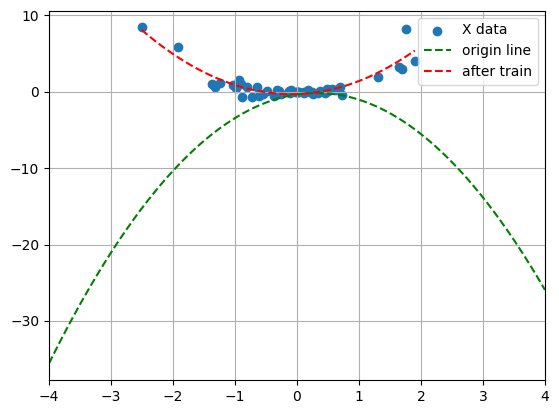

In [17]:
line_X = np.arange(min(X), max(X), 0.001)
line_Y = a*line_X**2 + b*line_X + c

plt.scatter(X, Y, label='X data')
plt.plot(X_, Y_, 'g--', label='origin line')
plt.plot(line_X, line_Y, 'r--', label='after train')
plt.xlim(-4., 4.)
plt.legend()
plt.grid()
plt.show()

<br>

<br>

## 로지스틱 회귀(Logistic Regression)
- 다항 분류, MNIST

<br>

### modules import

In [18]:
from tensorflow.keras.datasets import mnist

<br>

### 하이퍼 파라미터 (Hyper Parameter)


In [46]:
num_classes = 10
num_features = 784

lr = 0.1
training_steps = 1000
batch_size = 256

<br<

### 데이터 로드

In [47]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train, x_test = np.array(x_train, np.float32), np.array(x_test, np.float32)

x_train, x_test = x_train.reshape([-1, num_features]), x_test.reshape([-1, num_features])

x_train, x_test = x_train / 255., x_test / 255.

### tf.data API 사용
- 03 에서 다시 다룸 

In [48]:
train_data = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_data = train_data.repeat().shuffle(5000).batch(batch_size).prefetch(1)

<br>

### 변수 지정

In [49]:
W = tf.Variable(tf.random.normal([num_features, num_classes]), name = 'weight')
b = tf.Variable(tf.zeros([num_classes]), name = 'bias')

<br>

### Util Functions

In [50]:
import math

In [55]:
def logistic_regression(x):
  return tf.nn.softmax(tf.matmul(x, W) + b)

def cross_entropy(pred_y, true_y):
  true_y = tf.one_hot(true_y, depth=num_classes)
  pred_y = tf.clip_by_value(pred_y, 1e-9, 1.)
  
  return tf.reduce_mean(-tf.reduce_sum(true_y * tf.math.log(pred_y), 1))

def accuracy(y_pred, y_true):
  correct_prediction = tf.equal(tf.argmax(y_pred, 1), tf.cast(y_true, tf.int64))

  return tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

<br>

### Optimizer

In [56]:
optimizer = tf.optimizers.SGD(lr)

In [57]:
def run_optimization(x, y):
  with tf.GradientTape() as tape:
    pred = logistic_regression(x)
    loss = cross_entropy(pred, y)

  gradients = tape.gradient(loss, [W, b])

  optimizer.apply_gradients(zip(gradients, [W, b]))

<br>

### 학습 진행

In [58]:
for step, (batch_x, batch_y) in enumerate(train_data.take(training_steps), 1):
  run_optimization(batch_x, batch_y)

  if step % 50 == 0:
    pred = logistic_regression(batch_x)
    loss = cross_entropy(pred, batch_y)
    acc = accuracy(pred, batch_y)
    print("step: {:4d}\tloss: {:.4f}\taccuracy: {:4f}".format(step, loss, acc))

step:   50	loss: 6.0489	accuracy: 0.191406
step:  100	loss: 3.7249	accuracy: 0.406250
step:  150	loss: 2.5895	accuracy: 0.527344
step:  200	loss: 2.5487	accuracy: 0.566406
step:  250	loss: 2.0848	accuracy: 0.625000
step:  300	loss: 2.1488	accuracy: 0.613281
step:  350	loss: 1.7201	accuracy: 0.621094
step:  400	loss: 1.5931	accuracy: 0.718750
step:  450	loss: 1.2354	accuracy: 0.742188
step:  500	loss: 1.2060	accuracy: 0.750000
step:  550	loss: 1.2188	accuracy: 0.761719
step:  600	loss: 1.1664	accuracy: 0.789062
step:  650	loss: 1.2991	accuracy: 0.761719
step:  700	loss: 0.8761	accuracy: 0.828125
step:  750	loss: 1.4900	accuracy: 0.730469
step:  800	loss: 1.1482	accuracy: 0.773438
step:  850	loss: 0.7253	accuracy: 0.824219
step:  900	loss: 1.1757	accuracy: 0.773438
step:  950	loss: 0.8031	accuracy: 0.816406
step: 1000	loss: 0.7934	accuracy: 0.796875


<br>

###  테스트

In [59]:
pred = logistic_regression(x_test)
print("Test Accuracy: {}".format(accuracy(pred, y_test)))

Test Accuracy: 0.8119000196456909


<br>

### 시각화

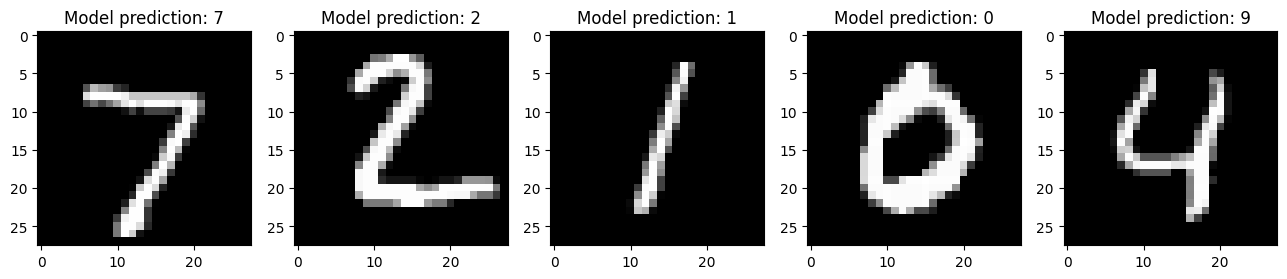

In [64]:
num_images = 5
test_images = x_test[:num_images]
predictions = logistic_regression(test_images)

plt.figure(figsize=(16, 8))

for i in range(1, num_images+1, 1):
  plt.subplot(1, num_images, i)
  plt.imshow(np.reshape(test_images[i-1], [28, 28]), cmap='gray')
  plt.title("Model prediction: {}".format(np.argmax(predictions.numpy()[i-1])))

plt.show()